<a href="https://colab.research.google.com/github/chaehyewon/2024-1-my-BDA/blob/main/inclass/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B3%BC%EC%A0%9C(%EC%A7%80%EC%A7%84%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D)01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터분석 <지진 데이터>

## title: 지진에 붙은 제목 이름
- magnitude: 지진의 규모
- date_time: 날짜 및 시간
- cdi: 이벤트 범위에 대해 보고된 최대 강도
- mmi: 이벤트에 대한 최대 추정 기기 강도
- alert: 경고 수준 - "녹색", "노란색", "주황색", "빨간색"
- tsunami(쓰나미): 해양 지역에서 발생하는 사건의 경우 "1", 그렇지 않은 경우 "0"

- sig: 이벤트의 중요성을 설명하는 숫자입니다. 숫자가 클수록 더 중요한 이벤트를 나타냅니다. 이 값은 크기, 최대 MMI, 펠트 보고서 및 예상 영향을 포함한 여러 요소에 따라 결정됩니다.
- net: 데이터 기여자의 ID입니다. 이 이벤트에 대한 기본 정보 소스로 간주되는 네트워크를 식별합니다.
- nst: 지진 위치를 결정하는 데 사용되는 지진 관측소의 총 수입니다.
- dmin : 진앙에서 가장 가까운 관측소까지의 수평거리
- 간격(gap): 방위상으로 인접한 측점 사이의 최대 방위각 간격(도 단위)입니다. 일반적으로 이 숫자가 작을수록 계산된 지진의 수평 위치가 더 신뢰할 수 있습니다. 방위각 간격이 180도를 초과하는 지진 위치는 일반적으로 위치 및 깊이 불확실성이 큽니다.
- magType: 이벤트의 선호 크기를 계산하는 데 사용되는 방법 또는 알고리즘
- depth(깊이): 지진이 파열되기 시작하는 깊이
- latitude / longitude(위도/경도): 지구 표면의 어떤 장소의 위치나 위치를 결정하고 설명할 수 있는 좌표계
- location(위치): 해당 국가 내 위치
- continent(대륙) : 지진 피해국의 대륙
- country(국가): 영향을 받은 국가

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.1 MB/s eta 0:00:00


## 그래프 설정

In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

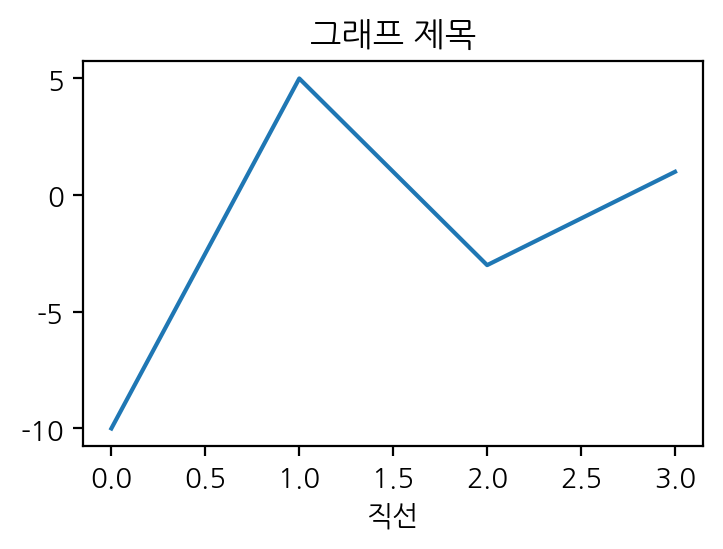

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 산점도 만들기

In [ ]:
import pandas as pd
mpg = pd.read_csv('earthquake_1995-2023.csv')

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
mpg.describe(include="all")

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
count,1000,1000.00,1000,1000.00,1000.00,449,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000,1000.00,1000.00,1000.00,994,284,651
unique,984,NaN,990,NaN,NaN,4,NaN,NaN,11,NaN,NaN,NaN,9,NaN,NaN,NaN,502,6,56
top,"M 6.5 - Kermadec Islands, New Zealand",NaN,11-01-2022 12:39,NaN,NaN,green,NaN,NaN,us,NaN,NaN,NaN,mww,NaN,NaN,NaN,"Kokopo, Papua New Guinea",Asia,Indonesia
freq,3,NaN,3,NaN,NaN,353,NaN,NaN,960,NaN,NaN,NaN,502,NaN,NaN,NaN,29,137,140
mean,NaN,6.94,NaN,3.60,6.03,NaN,0.33,847.91,NaN,193.92,1.13,20.93,NaN,74.61,4.32,51.49,NaN,NaN,NaN
std,NaN,0.44,NaN,3.33,1.43,NaN,0.47,301.80,NaN,239.05,2.07,24.42,NaN,130.81,26.63,117.48,NaN,NaN,NaN
min,NaN,6.50,NaN,0.00,1.00,NaN,0.00,650.00,NaN,0.00,0.00,0.00,NaN,2.70,-61.85,-179.97,NaN,NaN,NaN
25%,NaN,6.60,NaN,0.00,5.00,NaN,0.00,691.00,NaN,0.00,0.00,0.00,NaN,16.00,-13.52,-71.69,NaN,NaN,NaN
50%,NaN,6.80,NaN,4.00,6.00,NaN,0.00,744.00,NaN,0.00,0.00,18.00,NaN,29.00,-2.44,107.79,NaN,NaN,NaN
75%,NaN,7.10,NaN,7.00,7.00,NaN,1.00,874.25,NaN,403.00,1.55,27.00,NaN,55.00,25.17,148.36,NaN,NaN,NaN


# 1. 상관 분석:

- 지진 규모와 깊이 간의 상관 관계 분석
- 지진 발생 빈도와 특정 기간(예: 계절, 시간대) 간의 상관 관계 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 불러오기
from google.colab import files
uploaded = files.upload()

# 파일 이름 변경
data_path = 'earthquake_1995-2023.csv'
df = pd.read_csv(data_path)

# 데이터 구조 파악
df.info()
df.head()


Saving earthquake_1995-2023.csv to earthquake_1995-2023 (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null  

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.18,25.0,mww,192.96,-13.88,167.16,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.68,40.0,mww,69.73,12.81,-88.13,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.63,28.0,mww,171.37,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.91,36.0,mww,32.57,54.38,-160.70,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.88,172.8,Mi,21.00,54.49,-160.80,Alaska Peninsula,NaN,NaN


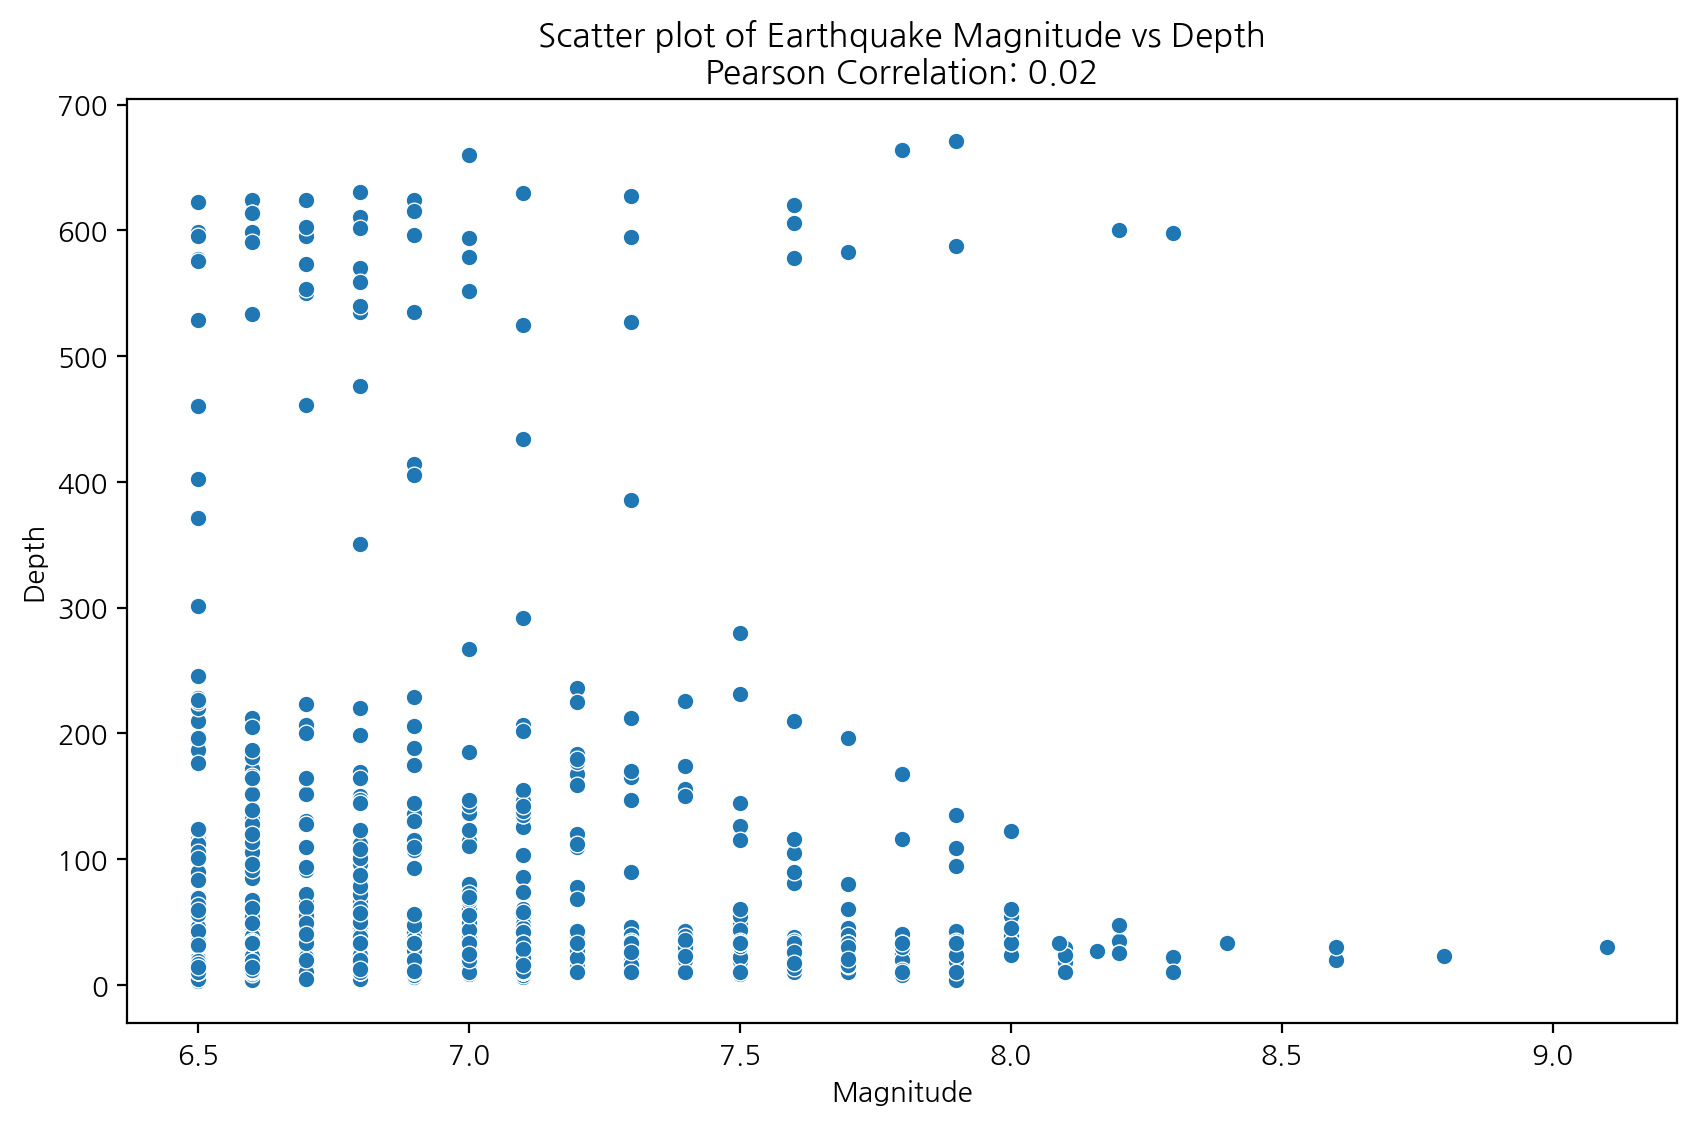

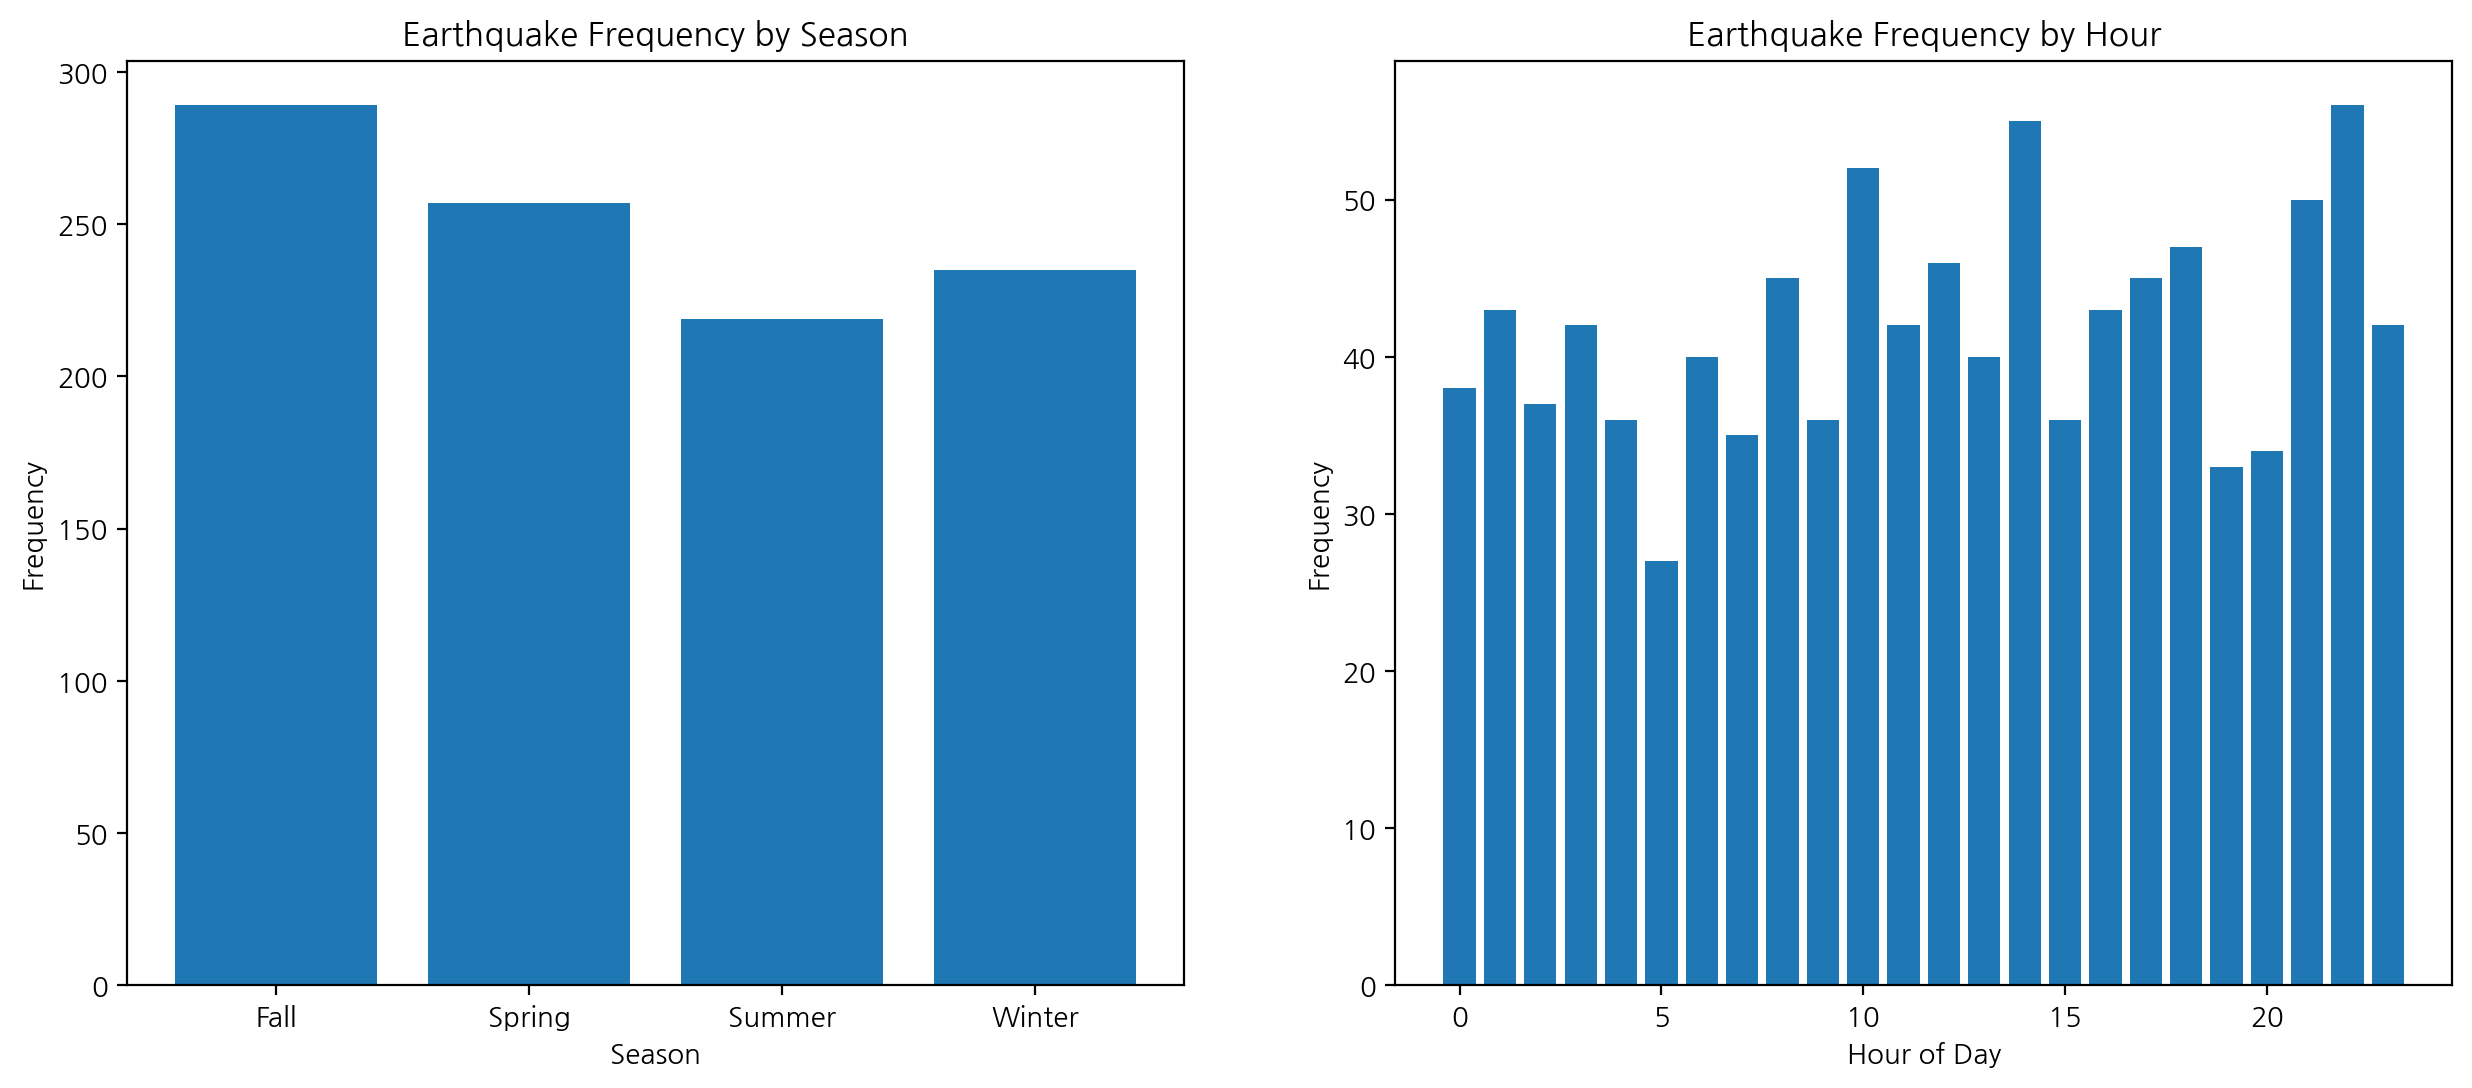

In [ ]:
# 날짜 형식 변환 및 계절, 시간대 추출
df['date_time'] = pd.to_datetime(df['date_time'])
df['Month'] = df['date_time'].dt.month
df['Hour'] = df['date_time'].dt.hour

# 계절 정보 추가
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# 지진 규모와 깊이 간의 피어슨 상관 계수 계산
magnitude_depth_corr, _ = pearsonr(df['magnitude'], df['depth'])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='magnitude', y='depth', data=df)
plt.title(f'Scatter plot of Earthquake Magnitude vs Depth\nPearson Correlation: {magnitude_depth_corr:.2f}')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.show()

# 계절별 지진 발생 빈도
season_freq = df['Season'].value_counts().sort_index()

# 시간대별 지진 발생 빈도
hour_freq = df['Hour'].value_counts().sort_index()

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 계절별 지진 발생 빈도 그래프
ax[0].bar(season_freq.index, season_freq.values)
ax[0].set_title('Earthquake Frequency by Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Frequency')

# 시간대별 지진 발생 빈도 그래프
ax[1].bar(hour_freq.index, hour_freq.values)
ax[1].set_title('Earthquake Frequency by Hour')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Frequency')

plt.show()


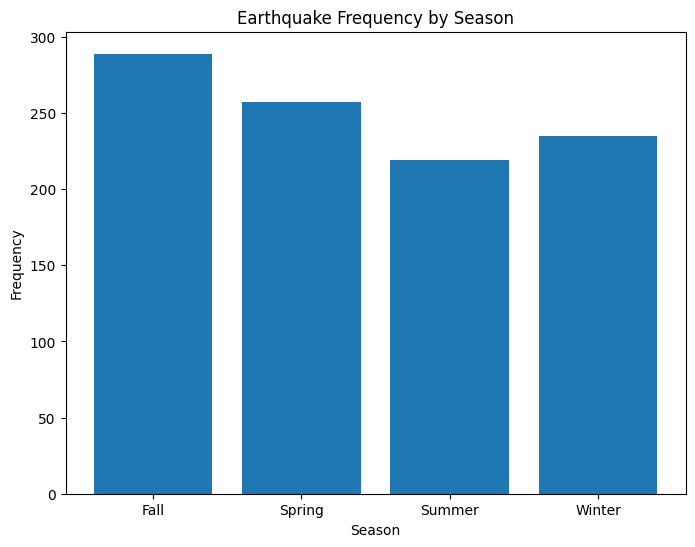

In [23]:
# 날짜 형식 변환 및 계절, 시간대 추출
df['date_time'] = pd.to_datetime(df['date_time'])
df['Month'] = df['date_time'].dt.month
df['Hour'] = df['date_time'].dt.hour

# 계절 정보 추가
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# 계절별 지진 발생 빈도
season_freq = df['Season'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(8, 6))

# 계절별 지진 발생 빈도 그래프
plt.bar(season_freq.index, season_freq.values)
plt.title('Earthquake Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')

plt.show()


# 2. 기초 통계 분석:

연도별, 월별, 일별 지진 발생 횟수 및 규모 분석
지진의 평균 규모, 최대 규모, 최소 규모 등의 통계값 계산

In [31]:
import pandas as pd

# 데이터 불러오기
from google.colab import files
uploaded = files.upload()

# 파일 이름 변경
data_path = 'earthquake_1995-2023.csv'
df = pd.read_csv(data_path)

# 날짜 형식 변환
df['date_time'] = pd.to_datetime(df['date_time'])


Saving earthquake_1995-2023.csv to earthquake_1995-2023 (2).csv


In [32]:
# 연도, 월, 일 정보 추출
df['Year'] = df['date_time'].dt.year
df['Month'] = df['date_time'].dt.month

# 연도별 지진 발생 횟수
yearly_counts = df['Year'].value_counts().sort_index()
print("연도별 지진 발생 횟수:\n", yearly_counts)

# 월별 지진 발생 횟수
monthly_counts = df['Month'].value_counts().sort_index()
print("\n월별 지진 발생 횟수:\n", monthly_counts)

연도별 지진 발생 횟수:
 Year
1995    29
1996    35
1997    28
1998    23
1999    33
2000    35
2001    28
2002    25
2003    31
2004    32
2005    28
2006    26
2007    37
2008    25
2009    26
2010    41
2011    34
2012    31
2013    53
2014    48
2015    53
2016    43
2017    36
2018    43
2019    33
2020    27
2021    42
2022    41
2023    34
Name: count, dtype: int64

월별 지진 발생 횟수:
 Month
1      85
2      79
3      81
4      95
5      81
6      57
7      77
8      85
9      92
10     90
11    107
12     71
Name: count, dtype: int64


In [33]:
# 지진 규모의 통계값 계산
magnitude_stats = df['magnitude'].describe()
print("\n지진 규모 통계값:\n", magnitude_stats)



지진 규모 통계값:
 count    1000.000000
mean        6.940150
std         0.438148
min         6.500000
25%         6.600000
50%         6.800000
75%         7.100000
max         9.100000
Name: magnitude, dtype: float64


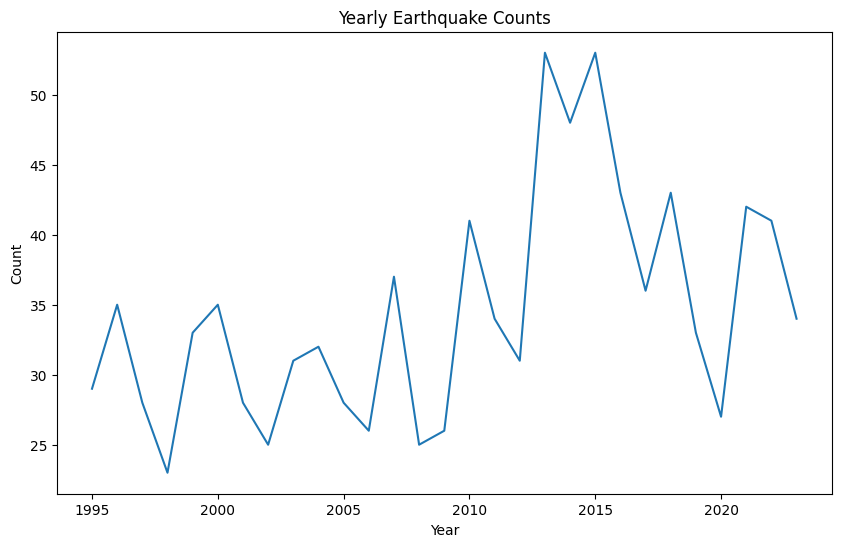

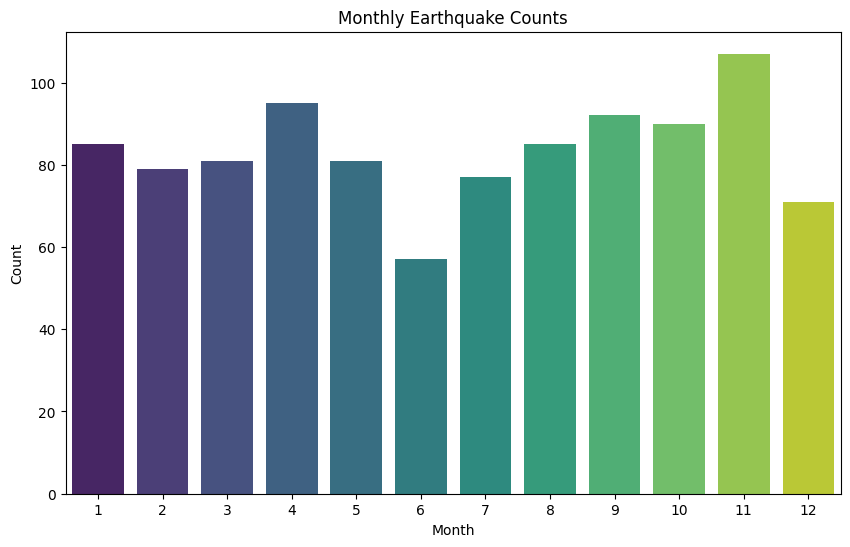

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연도별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_counts)
plt.title('Yearly Earthquake Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# 월별 지진 발생 횟수 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('Monthly Earthquake Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


# 3. 분포 분석:

지진 규모의 분포 분석 (예: 히스토그램, 커널 밀도 추정)
지진 발생 깊이의 분포 분석  

In [ ]:
import pandas as pd

# 데이터 불러오기
from google.colab import files
uploaded = files.upload()

# 파일 이름을 확인하고 변경
data_path = 'earthquake_1995-2023.csv'
df = pd.read_csv(data_path)

# 날짜 형식 변환
df['date_time'] = pd.to_datetime(df['date_time'])


Saving earthquake_1995-2023.csv to earthquake_1995-2023 (4).csv


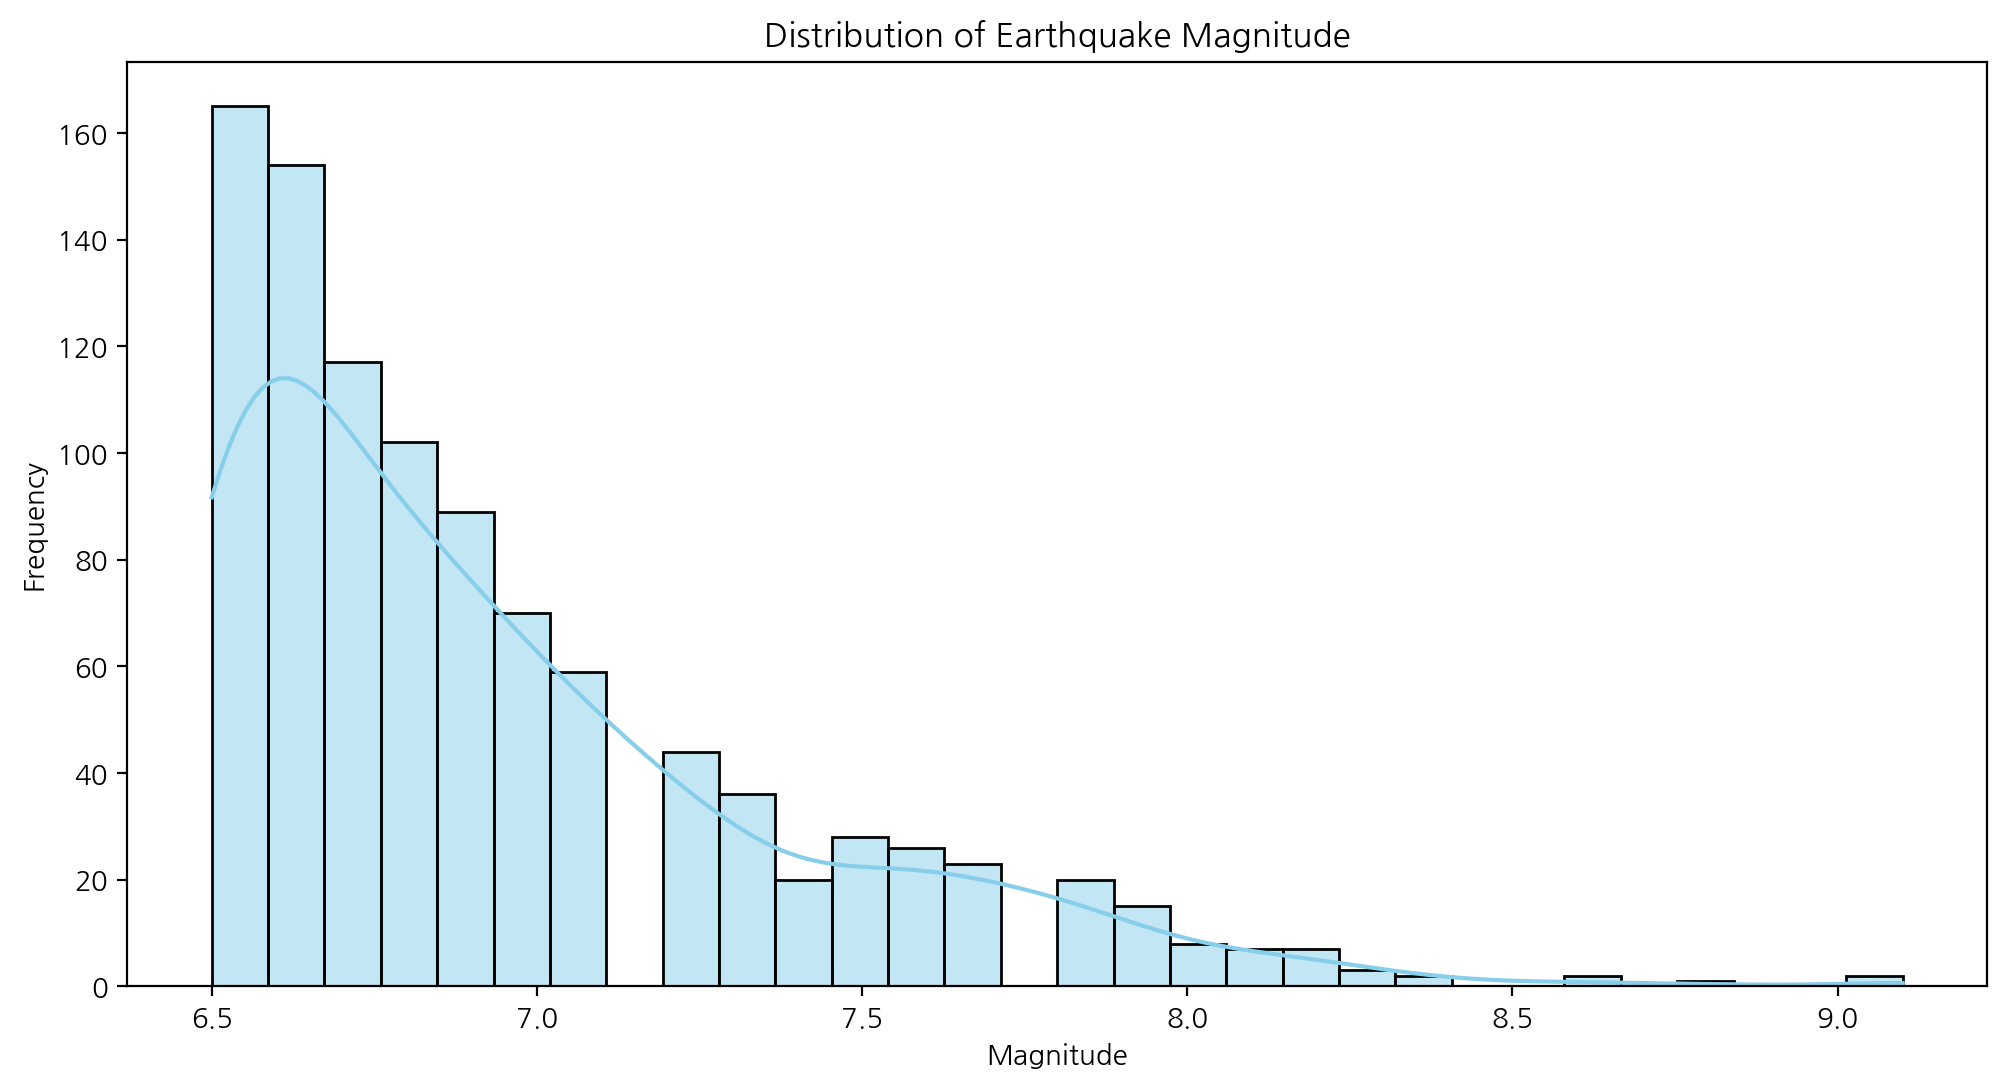

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 지진 규모 히스토그램 및 커널 밀도 추정
plt.figure(figsize=(12, 6))
sns.histplot(df['magnitude'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


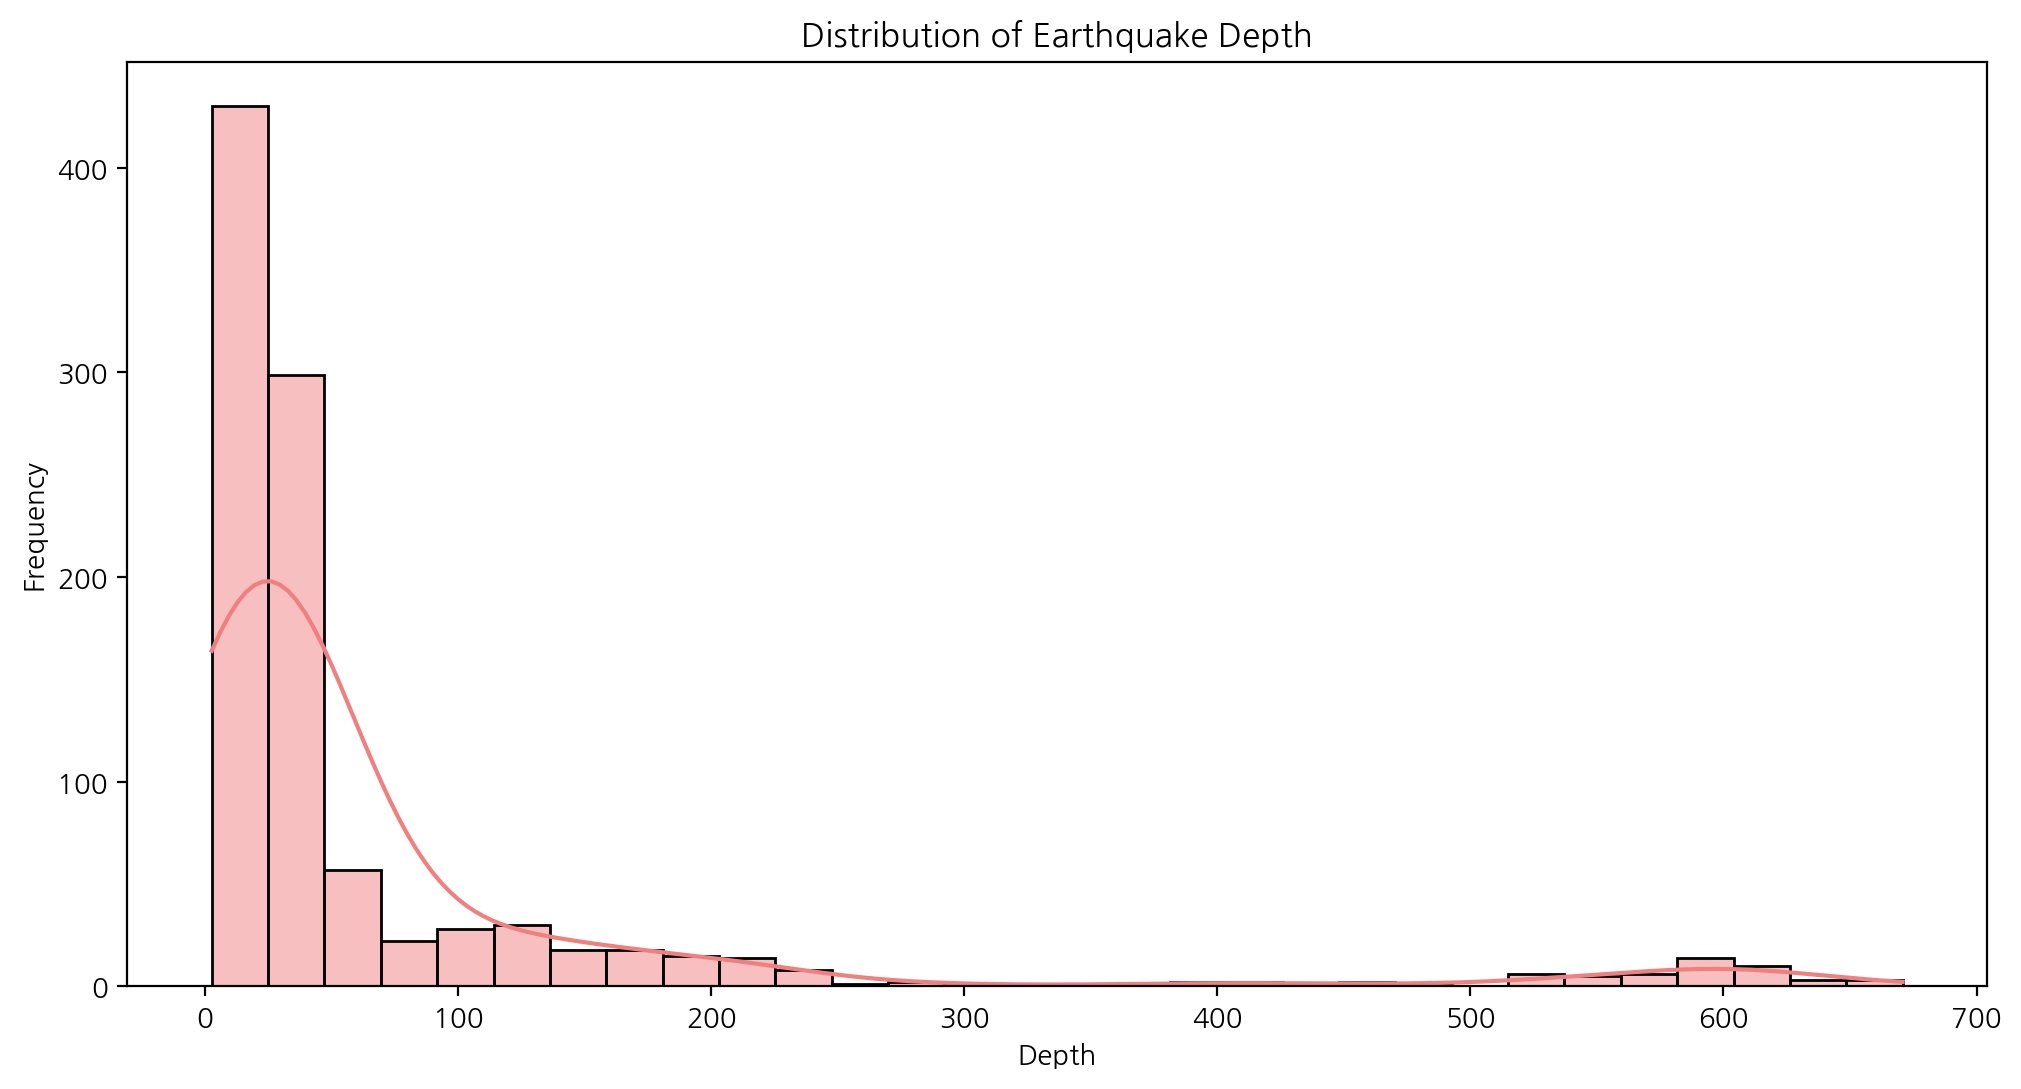

In [ ]:
# 지진 발생 깊이 히스토그램 및 커널 밀도 추정
plt.figure(figsize=(12, 6))
sns.histplot(df['depth'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Earthquake Depth')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

# 캐글 지진 데이터분석 예시 코드


Tremor & Earthquake Data Analysis 🌎🌏
- 진동 및 지진 데이터 분석 🌎🌏


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('earthquake_1995-2023.csv')
data = df.copy()

Visualizing null values per column
- 칼럼니스트 대변을 위한 화폐를 제시한다.


There are 4 columns with missing values:
['alert' 'location' 'continent' 'country']



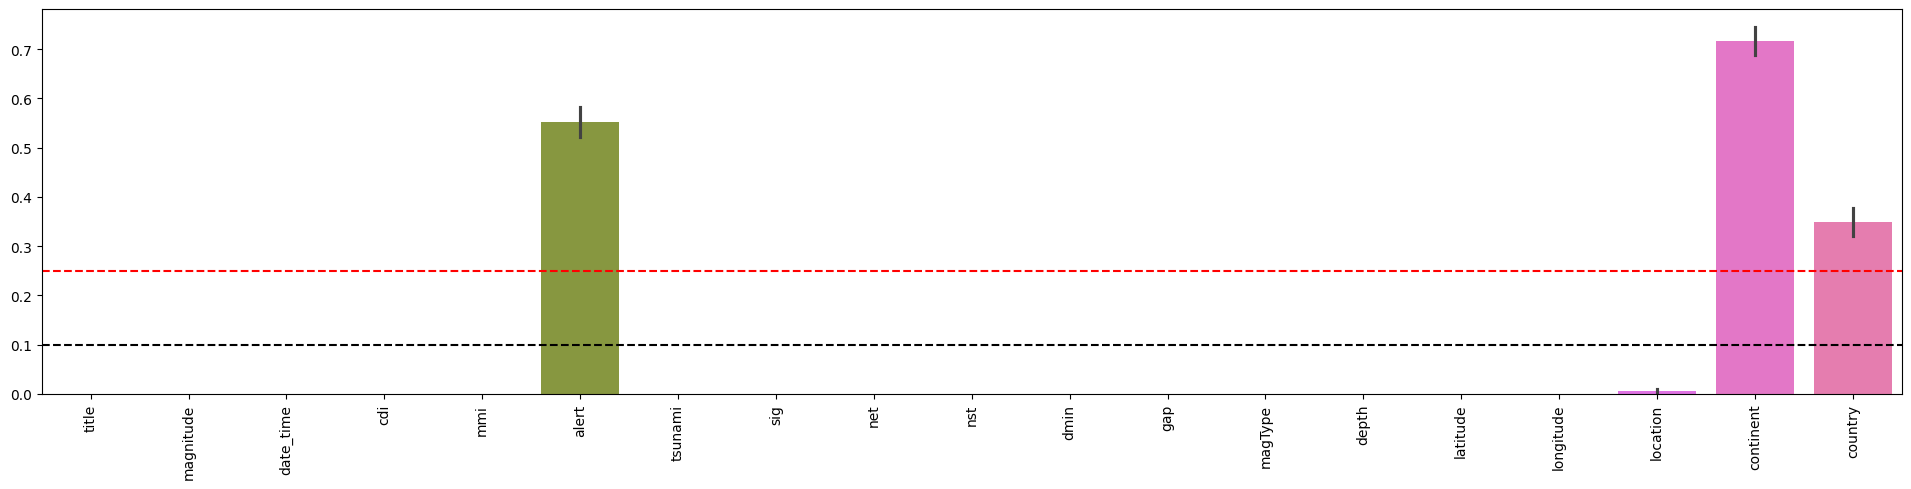

In [7]:
_ = data.columns[data.isna().any()]
print(colored(f'\nThere are {len(_)} columns with missing values:', color='red', attrs=['bold', 'blink']))
print('{}\n'.format(_.values))

_, ax = plt.subplots(figsize=(24, 5))
sns.barplot(data=data.isna(), ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.axhline(0.25, ls='--', c='r')
ax.axhline(0.1, ls='--', c='k')
_ = None

⚠️ The columns alert, continent and country have all more than 25% of it's values missing. However, continent values can be easily infered, alert won't be analysed in this notebook and any country value can be found in location column. Thus, under missing values criterion, the dataset is safe and concise enough to be used for an analyses. Data inference will be used when needed.
- ⚠ ️ 경고, 대륙 및 국가 열에 25% 이상의 값이 모두 누락되어 있습니다. 하지만 대륙 값은 쉽게 추론할 수 있고 경고는 이 노트북에서 분석되지 않으며 국가 값은 위치 열에서 찾을 수 있습니다. 따라서 누락된 값 기준에서 데이터 세트는 분석에 사용할 수 있을 만큼 안전하고 간결합니다. 데이터 추론은 필요할 때 사용됩니다.

Visualizing Earthquake Distribution Over the Earth 🌎🌏
- 지구의 지진 분포 시각화 🌎🌏

In [8]:
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )

    return fig

Visualizing Earthquake Location and Magnitude 📏
- 지진 위치 및 규모 시각화 📏

In [9]:
# Creating visually differentiable values      v Diminishing the difference, to avoid vanishing points in map
data['power'] = pow(10, data['magnitude']) / pow(3, data['magnitude'])
data['power'] = data['power'].round(0)

fig = make_world_fig(data, 'latitude', 'longitude', 'magnitude', 'power', ["red"], 1.5, 500)
fig.show()

Visualizing Earthquake Location and Impact 🏘
- 지진 위치 및 영향 시각화

In [10]:
data['sig'] = data['sig'] ** 2 / 10_000 # Creating visually differentiable values for sig
data['sig'] = data['sig'].round(0)

fig = make_world_fig(data, 'latitude', 'longitude', 'magnitude', 'sig', ["red"], 1.5, 500)
fig.show()

Visualizing Tsunami Location and Impact 🌊
- 쓰나미 위치 및 영향 시각화

In [11]:
tsun = data[data['tsunami'] == 1]

fig = make_world_fig(tsun, 'latitude', 'longitude', 'magnitude', 'sig', ["orange"], 1.5, 500)
fig.show()

Earthquakes with and without Tsunamis - Impact Analysis 🌊
- 쓰나미가 있는 경우와 없는 경우의 지진 - 영향 분석

In [12]:
fig = px.scatter(df.assign(tsunami=df["tsunami"].astype(str)),
                 x='magnitude',
                 y='sig',
                 color='tsunami',
                 color_discrete_sequence=['#F0F600', '#D81159'],
                 trendline='ols',
                 trendline_scope="trace")

fig.update_layout(
    title='Magnitude and Impact Correlation',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()

Visualizing Data by Country 🏳️🚩
- 국가별 데이터 시각화

In [19]:
# Preparing data
data['location'] = data['location'].str.split(', ').str[-1]
s = data['location'].value_counts().sort_values(ascending=False).reset_index()
top_15 = s.iloc[:15, 0].to_list()
s['location'] = s['location'].apply(lambda x: 'Other' if x not in top_15 else x)
s = s.groupby('location').agg('sum').reset_index().sort_values(by='count', ascending=False)

# Exploding indexes
pull = [0] * len(s)
for i in range(4):
    pull[i] = 0.14

# Color Gradient
gradient = ['#D81159', '#EA320D', '#D70F0F', '#EE5622',
            '#F18805', '#F0A202', '#F0F600', '#ECA72C',
            '#C37D92', '#8F3985', '#8F2D56', '#D88C9A',
            '#FF729F', '#A4036F', '#A675A1', '#8A1C7C']

# Plotting
fig3 = px.pie(s, names='location', values='count', title='Tremor occurrences by country | region', color_discrete_sequence=gradient)
fig3.update_traces(hole=0.3, pull=pull)
fig3.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)
fig3.show()

Visualizing Seismic Activity Through Time ⏳
- 시간에 따른 지진활동 가시화

In [14]:
# Adding year column and creating Other location ('minor activity countries')
data['year'] = pd.to_datetime(data['date_time']).dt.year
data['location'] = data['location'].apply(lambda x: 'Other' if x not in top_15 else x)

# Creating Dataframe for fig
time = data.groupby(['location', 'year']).agg('count').reset_index()[['location', 'year', 'title']]
to_print = ['World', 'Indonesia', 'Minor Activity Countries', 'Japan', 'Papua New Guinea'] # columns to be printed

# Contains all years from 1995 - 2023
all_years = [x for x in range(1995, 2024)]

# Creating Indonesia and Other columns
indonesia = time[time['location'] == 'Indonesia'].set_index('year')
other = time[time['location'] == 'Other'].set_index('year')
japan = time[time['location'] == 'Japan'].set_index('year').reindex(all_years, fill_value=0)
papua = time[time['location'] == 'Papua New Guinea'].set_index('year').reindex(all_years, fill_value=0)

# Adding the two columns above into world
world = data.groupby('year').agg('count')[['title']]
world['idn'] = indonesia['title']
world['oth'] = other['title']
world['jpn'] = japan['title']
world['png'] = papua['title']

world.columns = to_print
world = world.reset_index()

# Plotting...
fig1 = px.line(world, x='year', y=to_print,
               title='Number of tremors by year (World, Indonesia, Japan, Papue New Guinea, and Minor Activity Countries)')

# Adjusting details
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis=dict(showgrid=False, title='Year'),
    yaxis=dict(showgrid=False, title='Number of Tremors')
)

# Line colors
line_colors = ['#5F0F40', '#9A031E', '#FB8B24', '#E2CFEA', '#0F4C5C']
for i, color in enumerate(line_colors):
    fig1.update_traces(selector=dict(name=to_print[i]), line=dict(color=color))

fig1.show()

Conclusions¶
A small portion of the Earth's crust is affected directly by earthquakes.
Those portions are located near the tectonic plates extremities, and suffers the most with the tremors.
Tremors that are followed by tsunamis usually causes more damage to infrastructure.
There's been a increase in seismic activity throughout the world along the last decade.
There's been a more uniform distribution of tremors across different regions in the last decade
There is a correlation between high seismic activity, and strong tremors that causes a lot of damage.
- 결론 ¶
지구 지각의 작은 부분이 지진의 직접적인 영향을 받습니다.
그 부분들은 지각판 말단 근처에 위치하고 있으며 진동으로 가장 큰 고통을 받습니다.
쓰나미가 뒤따르는 진동은 일반적으로 인프라에 더 큰 피해를 입힙니다.
지난 10년 동안 전 세계적으로 지진 활동이 증가했습니다.
지난 10년 동안 여러 지역에 걸쳐 더 균일한 진동 분포가 있었습니다
높은 지진 활동과 많은 피해를 주는 강한 진동 사이에는 상관관계가 있습니다.